In [ ]:
%pip install numpy
%pip install pandas
%pip install requests
%pip install matplotlib

Importing Required Libraries


In [5]:
import numpy as np
import pandas as pd
import requests
import zipfile
from io import BytesIO
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
secom_zip_url = "https://archive.ics.uci.edu/static/public/179/secom.zip"

In [7]:
secom_zip_file = requests.get(secom_zip_url)

In [8]:
secom_files =  zipfile.ZipFile(BytesIO(secom_zip_file.content), 'r')

secom_files_names =  (zipfile.ZipFile(BytesIO(secom_zip_file.content))).namelist()
print(secom_files_names)

['secom.data', 'secom.names', 'secom_labels.data']


In [9]:
f_file = secom_files.open('secom.data')
l_file = secom_files.open('secom_labels.data')

In [10]:
#Create  column names and pandas dataframes for labels data

l_column_names=['classifications', 'date_time'] # create column labels

secom_labels_df = pd.read_csv(l_file, sep=r'\s+', header=None, names= l_column_names)

print(f"Dimensions of Labels data: ", secom_labels_df.shape)

print(secom_labels_df.head())

Dimensions of Labels data:  (1567, 2)
   classifications            date_time
0               -1  19/07/2008 11:55:00
1               -1  19/07/2008 12:32:00
2                1  19/07/2008 13:17:00
3               -1  19/07/2008 14:43:00
4               -1  19/07/2008 15:22:00



convert time stamps column to datetime format and Check if the timestamps column is ordinal (from latest to ealatest time)

In [11]:
#convert time stamps column to datetime format and Check if the timestamps column is ordinal (from latest to ealatest time)

secom_labels_df['date_time'] = pd.to_datetime(secom_labels_df['date_time'], format='%d/%m/%Y %H:%M:%S')

is_ascending = secom_labels_df['date_time'].is_monotonic_increasing

if is_ascending:
    print("The timestamps column is in ascending order.")
else:
    print("The timestamps column is not in ascending order.")

The timestamps column is in ascending order.


Date columns separation

In [12]:
# separating date columns 
t_df = secom_labels_df.copy()
t_df["time"] = t_df["date_time"].dt.time
t_df["date"] = pd.to_datetime(t_df["date_time"].dt.date)
t_df["year"] = t_df["date"].dt.year
t_df["month"] = t_df["date"].dt.month
t_df["day"] = t_df["date"].dt.day

t_df

,classifications,date_time,time,date,year,month,day
0,-1,2008-07-19 11:55:00,11:55:00,2008-07-19,2008,7,19
1,-1,2008-07-19 12:32:00,12:32:00,2008-07-19,2008,7,19
2,1,2008-07-19 13:17:00,13:17:00,2008-07-19,2008,7,19
3,-1,2008-07-19 14:43:00,14:43:00,2008-07-19,2008,7,19
4,-1,2008-07-19 15:22:00,15:22:00,2008-07-19,2008,7,19
...,...,...,...,...,...,...,...
1562,-1,2008-10-16 15:13:00,15:13:00,2008-10-16,2008,10,16
1563,-1,2008-10-16 20:49:00,20:49:00,2008-10-16,2008,10,16
1564,-1,2008-10-17 05:26:00,05:26:00,2008-10-17,2008,10,17
1565,-1,2008-10-17 06:01:00,06:01:00,2008-10-17,2008,10,17


In [13]:
result_fail = secom_labels_df["classifications"].value_counts().get(1, 0)
result_pass = secom_labels_df["classifications"].value_counts().get(-1, 0)

print(f"The number of failure: {result_fail} \nThe number of pass:    {result_pass}")


The number of failure: 104 
The number of pass:    1463


In [14]:
#Create column names pandas dataframes features data
f_column_names = [f"feature_{i}" for i in range(1, 592)]

secom_features_df = pd.read_csv(f_file, sep=r'\s+', header=None, names= f_column_names)
print(f"Dimensions of Features' data: ", secom_features_df.shape)
print("---------------------------------------------------------")
print(secom_features_df.head())

Dimensions of Features' data:  (1567, 591)
---------------------------------------------------------
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602      100.0   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294      100.0   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102      100.0   
3    2988.72    2479.90  2199.0333   909.7926     1.3204      100.0   
4    3032.24    2502.87  2233.3667  1326.5200     1.5334      100.0   

   feature_7  feature_8  feature_9  feature_10  ...  feature_582  feature_583  \
0    97.6133     0.1242     1.5005      0.0162  ...          NaN       0.5005   
1   102.3433     0.1247     1.4966     -0.0005  ...     208.2045       0.5019   
2    95.4878     0.1241     1.4436      0.0041  ...      82.8602       0.4958   
3   104.2367     0.1217     1.4882     -0.0124  ...      73.8432       0.4990   
4   100.3967     0.1235     1.5031     -0.0031  ...          NaN   

3.0 DATA PREPARATION

Merge the Features and Labels data frames

In [15]:
secom_merged_df = pd.merge(secom_labels_df, secom_features_df, left_index=True, right_index=True)

print(f"Dimensions of merged data: ", secom_merged_df.shape)

print(secom_merged_df.head())

Dimensions of merged data:  (1567, 593)
   classifications           date_time  feature_1  feature_2  feature_3  \
0               -1 2008-07-19 11:55:00    3030.93    2564.00  2187.7333   
1               -1 2008-07-19 12:32:00    3095.78    2465.14  2230.4222   
2                1 2008-07-19 13:17:00    2932.61    2559.94  2186.4111   
3               -1 2008-07-19 14:43:00    2988.72    2479.90  2199.0333   
4               -1 2008-07-19 15:22:00    3032.24    2502.87  2233.3667   

   feature_4  feature_5  feature_6  feature_7  feature_8  ...  feature_582  \
0  1411.1265     1.3602      100.0    97.6133     0.1242  ...          NaN   
1  1463.6606     0.8294      100.0   102.3433     0.1247  ...     208.2045   
2  1698.0172     1.5102      100.0    95.4878     0.1241  ...      82.8602   
3   909.7926     1.3204      100.0   104.2367     0.1217  ...      73.8432   
4  1326.5200     1.5334      100.0   100.3967     0.1235  ...          NaN   

   feature_583  feature_584  feature_585

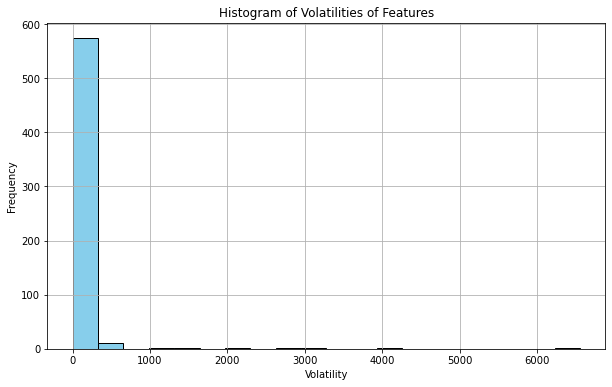

In [16]:
# 1. Histogram of Volatilities of Features
# Select numeric columns for calculating standard deviation
numeric_columns = secom_merged_df.select_dtypes(include=['number'])

# Plot histogram of volatilities of features
plt.figure(figsize=(10, 6))
numeric_columns.std().hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Volatilities of Features')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



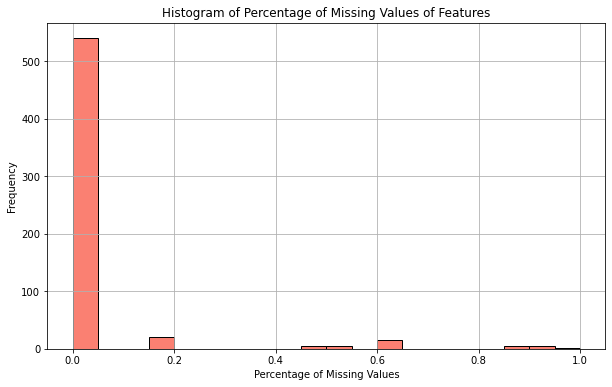

In [17]:
# 2. Histogram of Percentage of Missing Values of Features
plt.figure(figsize=(10, 6))
(secom_merged_df.isnull().sum() / len(secom_merged_df)).hist(bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Percentage of Missing Values of Features')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


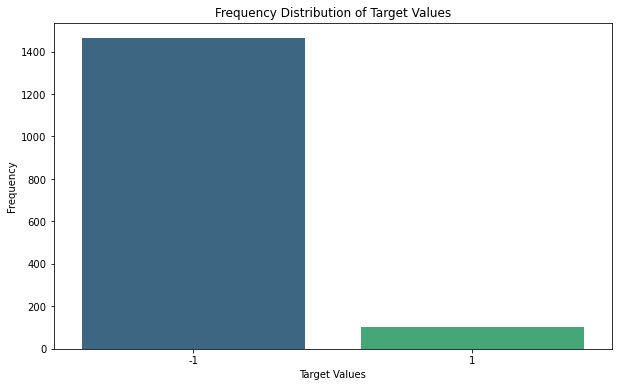

In [18]:
# 3. Frequency Distribution of Target Values
plt.figure(figsize=(10, 6))
sns.countplot(x='classifications', data=secom_merged_df, palette='viridis')
plt.title('Frequency Distribution of Target Values')
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.show()

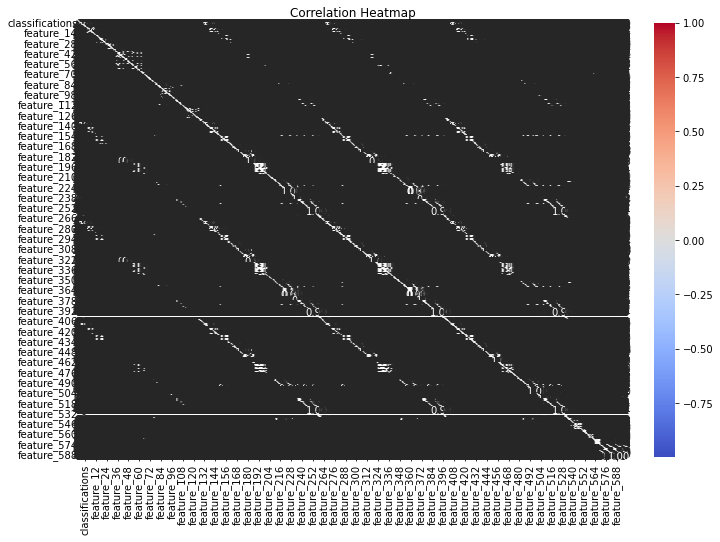

In [20]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = secom_merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()